In [4]:
ALL_CANCERS = [
    'SARC',
    'LIHC',
    'THYM',
    'ACC',
    'BRCA',
    'KICH',
    'STAD',
    'BLCA',
    'THCA',
    'GBMLGG',
    'UCEC',
    'LUAD',
    'KIRC',
    'KIRP',
    'PAAD',
    'CESC',
    'PCPG',
    'MESO',
    'SKCM',
    'PRAD',
    'COADREAD',
    'ESCA',
    'LUSC',
    'HNSC',
    'OV',
    'TGCT',
    # 'CHOL',
    # 'DLBC',
    # 'UCS'
 ]
sorted(ALL_CANCERS)

['ACC',
 'BLCA',
 'BRCA',
 'CESC',
 'COADREAD',
 'ESCA',
 'GBMLGG',
 'HNSC',
 'KICH',
 'KIRC',
 'KIRP',
 'LIHC',
 'LUAD',
 'LUSC',
 'MESO',
 'OV',
 'PAAD',
 'PCPG',
 'PRAD',
 'SARC',
 'SKCM',
 'STAD',
 'TGCT',
 'THCA',
 'THYM',
 'UCEC']

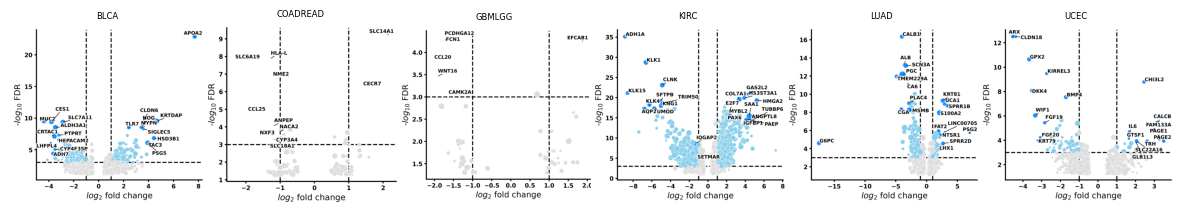

In [7]:
import os, glob
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from matplotlib.patches import Rectangle

temp = "Hot"
cv_experiment = 'results_final/morphology/dseq_results/'

ALL_CANCERS = [
    # 'ACC',
 'BLCA',
#  'BRCA',
#  'CESC',
 'COADREAD',
#  'ESCA',
 'GBMLGG',
#  'HNSC',
#  'KICH',
 'KIRC',
#  'KIRP',
#  'LIHC',
 'LUAD',
#  'LUSC',
#  'MESO',
#  'OV',
#  'PAAD',
#  'PCPG',
#  'PRAD',
#  'SARC',
#  'SKCM',
#  'STAD',
#  'TGCT',
#  'THCA',
#  'THYM',
 'UCEC',
#  'CHOL',
#  'UCS',
#  'DLBC'
 ]

i = 1
num_rows = 1  # You are using 4 rows in your subplot grid
num_cols = 6  # You are using 8 columns in your subplot grid
cropped_height = None
cropped_width = -507

fig = plt.figure(figsize=(num_cols*2.5, num_rows*2.5))

for cancer_type in sorted(ALL_CANCERS):
    file_path = f"{cv_experiment}/{cancer_type}/Mitotic-{temp}/volcano.png"
    ax = plt.subplot(num_rows, num_cols, i)
    try:
        km_plot = cv2.imread(file_path)[:,:,::-1]  # Load the image

        # Apply cropping logic
        if cropped_height is not None:  # If not in the last row, crop height to 1580
            km_plot = km_plot[:cropped_height, :]
        if cropped_width is not None:  # If not in the first column, crop width to start from column 300
            km_plot = km_plot[:, :cropped_width]
    
        # Display cropped image
        ax.imshow(km_plot)
        ax.set_title(cancer_type, fontsize=6)
        i += 1
    except Exception as e:
        print(f"Failed {cancer_type} - {e}")

    ax.axis('off')

fig.subplots_adjust(hspace=0.0, wspace=0)

save_path=f"{cv_experiment}/Mitotic-{temp}_aggregated_volcano_selected"
fig.savefig(save_path+'.png', dpi=600, bbox_inches='tight', pad_inches=0)
